In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import math
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
import warnings

In [ ]:
def sorted_k_euc_dist(x_train, point, k):
  dist=[0]*len(x_train)
  distt=[0]*len(x_train)
  # var=0
  for i in range(len(x_train)):
    var=0
    for j in range(len(point)):
      var += np.square(x_train[i][j]-point[j])
    distt[i] = math.sqrt(var)
  distances = pd.DataFrame(data=distt,columns=['Euclidean Distance'])
  sorted_dist=distances.sort_values(by=['Euclidean Distance'])
  sorted_dist=sorted_dist[:k]

  return(sorted_dist)

In [ ]:
def f_rest(result_array,y_test):
  f1=0
  tp,tn,fp,fn=0,0,0,0
  for i in range(len(y_test)):
    if result_array[i]==0:
      if y_test[i]==0:
        tp+=1
      else:
        fp+=1
    else:
      if y_test[i]==0:
        fn+=1
      else:
        tn+=1
  if tp+fp == 0:
    precision = 0
  else:
    precision = tp/(tp+fp)
  # print('precision = ',precision)
  if tp+fn ==0:
    recall = 0
  else:
    recall = tp/(tp+fn)
  # print('recall =',recall)
  if (precision+recall) == 0:
    f1=0
  else:
    f1 = 2*(precision*recall)/(precision+recall)
  return f1

In [ ]:
def majority_vote_park(knn_array):
  # print(knn_array)
  arr=[]
  print
  for i in knn_array.index:
    arr.append((y_train_p[i]))
  return(Counter(arr).most_common(1)[0][0])

In [ ]:
p=pd.read_csv('/content/parkinsons.csv')

In [ ]:
p_x = p.iloc[:,:-1]
p_y = p.iloc[:,-1]
p_x = np.asarray(p_x)
p_y = np.asarray(p_y)
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(p_x, p_y, test_size=0.2, shuffle=True)
scaler= Normalizer().fit(x_test_p)
x_train_t= scaler.transform(x_train_p)
x_test_t= scaler.transform(x_test_p)

In [ ]:
# for titanic dataset
warnings.filterwarnings("ignore")
k_list = list(range(1,31,2))
acc_test=[]
all_f1=[]
acc_train=[]
var1_test=[]
var1_train=[]
for k in k_list:
  avg_test=[]
  avg_train=[]
  avg_acc_test=0
  avg_acc_train=0
  avg_f1=0
  for i in range(10):

    p_x = p.iloc[:,:-1]
    p_y = p.iloc[:,-1]
    p_x = np.asarray(p_x)
    p_y = np.asarray(p_y)
    x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(p_x, p_y, test_size=0.1, shuffle=True)
    scaler= Normalizer().fit(x_test_p)
    x_train_t= scaler.transform(x_train_p)
    x_test_t= scaler.transform(x_test_p)
    count_test=0
    count_train=0
    acc=0
    correct_pred_test=0
    correct_pred_train=0

    # this is testing set values
    count=0
    ans_array=[]
    for point2 in x_test_p:
      # print(len(point2))
      knn_array=sorted_k_euc_dist(x_train_p, point2, k)
      # print(count)
      answer=majority_vote_park(knn_array)
      ans_array.append(answer)
      count+=1
      if answer==y_test_p[count_test]:
        correct_pred_test+=1
      count_test+=1
      #print(k," ",count)
    f1=f_rest(ans_array,y_test_p)
    acc=correct_pred_test/count_test
    avg_test.append(acc)
    avg_acc_test+=acc
    avg_f1+=f1
    # print(avg_acc)
  avg_f1/=10
  avg_acc_test/=10
  avg_acc_train/=10
  var1_test.append(np.std(avg_test))
  var1_train.append(np.std(avg_train))
  acc_test.append(avg_acc_test) #has avg acc of all k values
  acc_train.append(avg_acc_train)
  all_f1.append(avg_f1)

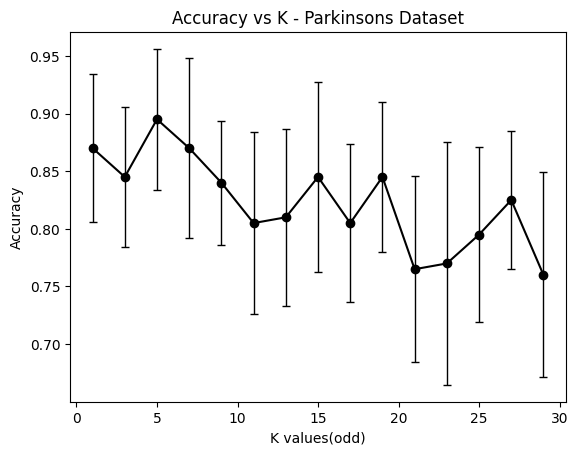

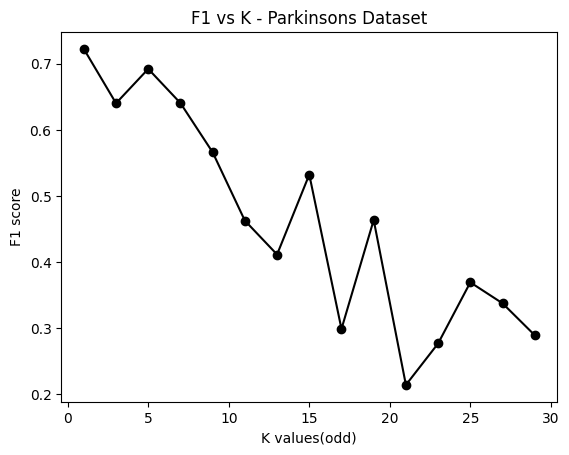

In [ ]:
plt.plot(k_list, acc_test, 'ko-')
plt.errorbar(k_list, acc_test, yerr=var1_test, fmt='none', ecolor='black', capsize=3, elinewidth=1, label='Standard Deviation')
plt.xlabel('K values(odd)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K - Parkinsons Dataset')
#plt.xticks(k_list)
plt.show()
print()
plt.plot(k_list, all_f1, 'ko-')
plt.xlabel('K values(odd)')
plt.ylabel('F1 score')
plt.title('F1 vs K - Parkinsons Dataset')
plt.show()

In [ ]:
combined = list(zip(acc_test, k_list))
sorted_combined = sorted(combined, key=lambda x: x[0], reverse=True)
for accuracy, k in sorted_combined[:3]:
    print("  k Value:", k," Accuracy:", accuracy, ' f1:',all_f1[int(k/2)])

  k Value: 5  Accuracy: 0.8950000000000001  f1: 0.6921789321789322
  k Value: 1  Accuracy: 0.8699999999999999  f1: 0.7223992673992674
  k Value: 7  Accuracy: 0.8699999999999999  f1: 0.6405050505050505


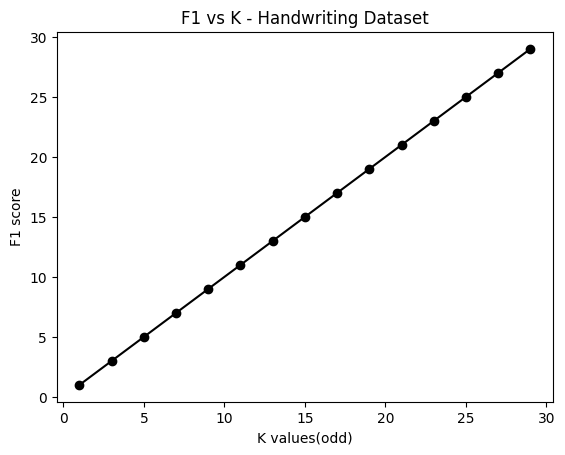

In [ ]:
k_list = list(range(1,31,2))
all_f1 = list(range(1,31,2))
plt.plot(k_list, all_f1, 'ko-')
plt.xlabel('K values(odd)')
plt.ylabel('F1 score')
plt.title('F1 vs K - Handwriting Dataset')
plt.show()